In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

def merge_on_matching_ids(file1, file2, file3):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df3 = pd.read_csv(file3)

    # Merge DataFrames on 'beer' and 'beer_id' columns using inner join to include only matching IDs
    merged_df = df1.merge(df2, on=['beer'], how='inner', suffixes=('', '_y'))
    merged_df = merged_df.merge(df3, on=['beer'], how='inner', suffixes=('', '_y'))
    # Remove duplicate rows on suffix
    merged_df.drop(merged_df.filter(regex='_y$').columns, axis=1, inplace=True)
    return merged_df

# Example usage:
# File names must be adapted accordingly
file1 = './../data/41467_2024_46346_MOESM4_ESM.csv'
file2 = './../data/41467_2024_46346_MOESM7_ESM.csv'
file3 = './../data/41467_2024_46346_MOESM10_ESM.csv'

merged_df = merge_on_matching_ids(file1, file2, file3)
#print(merged_df)
# Convert string in tasting_category_fine using factorize
merged_df['tasting_category_fine'], category_mapping = pd.factorize(merged_df['tasting_category_fine'])

# Optionally, write the result to a CSV file
merged_df.to_csv('./../data/result/mergedData.csv', index=False)
# Not working
#merged_df.to_csv('C:/Users/stefa/Desktop/Studium/Master/Semester_2/DML/Project/beer-dataset/mergedData.csv', index=False, quoting=csv.QUOTE_ALL)

In [2]:
# Do some analysis on the data
# 1. Count the number of NAs in each row
merged_df['na_count'] = merged_df.isna().sum(axis=1)
# 1.1 Count the number of NAs in each Column
# 2. Count the number of NAs in each column
na_counts_per_column = merged_df.isna().sum()
#print("\nNumber of NAs in each column:")
#print(na_counts_per_column)
na_counts_per_column = na_counts_per_column[na_counts_per_column > 0]

In [3]:
# Define the threshold for NA counts
threshold = 30
# Filter to show only columns with NA counts greater than the threshold
columns_to_drop = na_counts_per_column[na_counts_per_column > threshold].index
# Drop the columns with NA counts greater than the threshold
merged_df_withoutNa = merged_df.drop(columns=columns_to_drop)

# Replace NAs in the remaining columns with 0
merged_df_withoutNa = merged_df_withoutNa.fillna(0)
# Optionally, write the result to a CSV file
merged_df_withoutNa.to_csv('./../data/result/mergedDataWithoutNAs.csv', sep=';', decimal=",", index=False)

In [5]:
# 2. Calculate highest, lowest, mean, and median values for each column that is numerical
numeric_df = merged_df.select_dtypes(include=[np.number])

statistics = numeric_df.describe().T
statistics['median'] = numeric_df.median()

#print("\nStatistics for each numerical column:")
#print(statistics[['min', 'max', 'mean', '50%', 'median']])
# Optional: Write the statistics to a CSV file
statistics.to_csv('./../data/result/columnStatistics.csv')

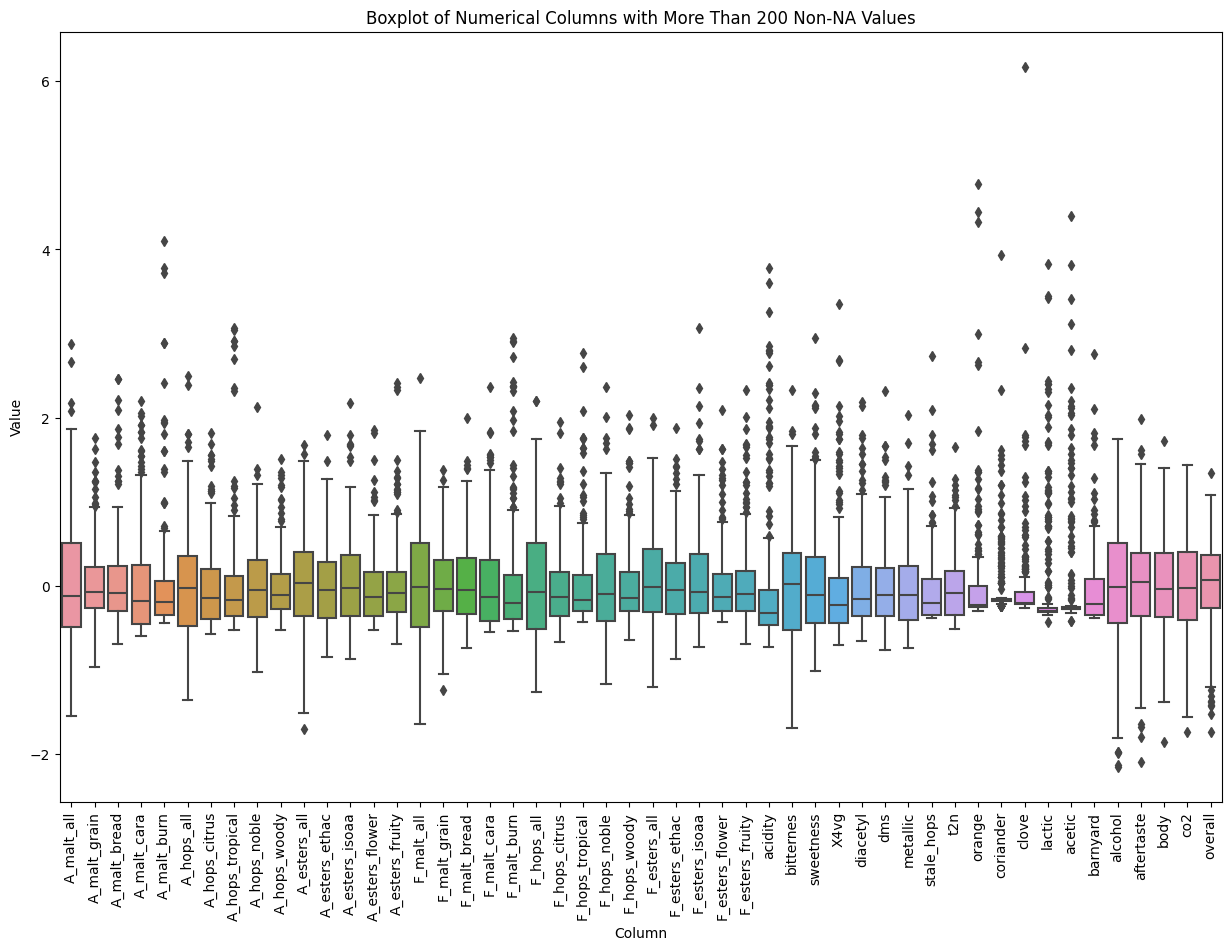

In [6]:
# Read CSV files into DataFrames
df2 = pd.read_csv(file2)
# Select columns excluding the first two
columns_to_include = df2.columns[2:]
# Select only numerical columns
numeric_df2 = df2[columns_to_include].select_dtypes(include=[np.number])
filtered_numeric_df2 = numeric_df2.loc[:, numeric_df2.count() > 200]

# Plotting boxplots for each filtered numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df2)
plt.title('Boxplot of Numerical Columns with More Than 200 Non-NA Values')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

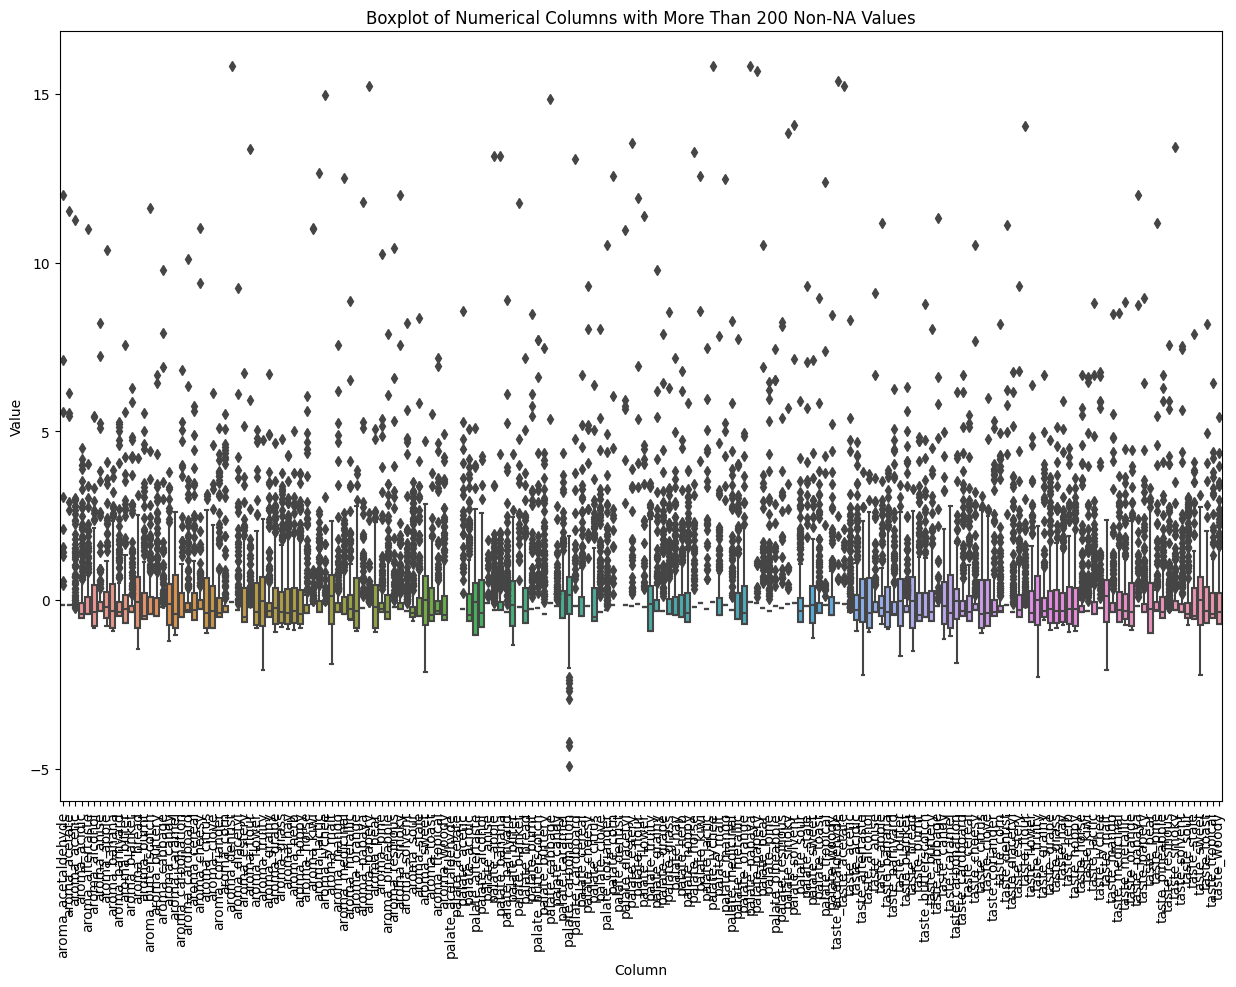

In [7]:
# Read CSV files into DataFrames
df3 = pd.read_csv(file3)
# Select columns excluding the first two
columns_to_include = df3.columns[2:]
# Select only numerical columns
numeric_df3 = df3[columns_to_include].select_dtypes(include=[np.number])
filtered_numeric_df3 = numeric_df3.loc[:, numeric_df3.count() > 200]

# Plotting boxplots for each filtered numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df3)
plt.title('Boxplot of Numerical Columns with More Than 200 Non-NA Values')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
# Optionally, write the result to a CSV file
merged_df.to_csv('./../data/result/mergedData2.csv', index=False)

In [9]:
spalte = merged_df.pop('overall')
merged_df['overall'] = spalte

# Modifiziertes DataFrame als CSV speichern
merged_df.to_csv('./../data/result/mergedData2OverallAtTheEnd.csv', index=False)

In [12]:
# Funktion, um die Korrelationen zu berechnen
def berechne_korrelationen(datei, ziel_spalte):
    # CSV-Datei einlesen
    df = pd.read_csv(datei)
    
    # Überprüfen, ob die Zielspalte in den Daten vorhanden ist
    if ziel_spalte not in df.columns:
        raise ValueError(f"Spalte '{ziel_spalte}' nicht in den Daten vorhanden.")
    
    # Korrelationen berechnen
    korrelationen = df.corr()[ziel_spalte]
    
    # Zielspalte aus dem Ergebnis entfernen, da die Korrelation mit sich selbst immer 1 ist
    korrelationen = korrelationen.drop(labels=[ziel_spalte])
    
    return korrelationen

# Beispielverwendung
datei = './../data/result/mergedData2OverallAtTheEnd.csv'  # Name der CSV-Datei
ziel_spalte = 'overall'  # Die Spalte, zu der die Korrelationen berechnet werden sollen

korrelationen = berechne_korrelationen(datei, ziel_spalte)
print(korrelationen)


beer                    -0.002728
beer_id                  0.015336
tasting_category_fine    0.229504
acetaldehyde             0.283626
CS2                      0.034395
                           ...   
taste_sweet             -0.072984
taste_toast              0.076489
taste_tropical           0.141736
taste_woody              0.075037
na_count                 0.026301
Name: overall, Length: 470, dtype: float64


In [13]:
def merge_on_matching_ids_without_overall(file1, file2, file3):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)[['beer', 'overall']]  # Only keep 'beer' and 'overall' columns
    df3 = pd.read_csv(file3)

    # Merge DataFrames on 'beer' column using inner join to include only matching IDs
    merged_df = df1.merge(df2, on='beer', how='inner', suffixes=('', '_y'))
    merged_df = merged_df.merge(df3, on='beer', how='inner', suffixes=('', '_y'))

    # Remove duplicate columns with suffix '_y'
    merged_df.drop(merged_df.filter(regex='_y$').columns, axis=1, inplace=True)
    
    return merged_df

# Example usage

merged_df_with_overall_from_7 = merge_on_matching_ids(file1, file2, file3)
merged_df_with_overall_from_7.to_csv('./../data/result/mergedDataWithOnlyOverallFromDataSet.csv', index=False)